In [188]:
from sklearn.cluster import KMeans  

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [166]:
location= "CreditCard.csv"

In [167]:
df=pd.read_csv(location)

In [168]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [169]:
df = df.dropna()

In [170]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [171]:
 df1=df[['BALANCE','CREDIT_LIMIT']]
df1.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
4,817.714335,1200.0
5,1809.828751,1800.0


 Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

Upload your Jupyter notebook to Github and submit the URL to turn in this assignment.

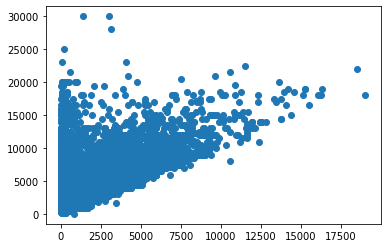

In [172]:
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'])

In [173]:
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [174]:
df1_predict=km.fit_predict(df1[['BALANCE','CREDIT_LIMIT']])
df1_predict

array([0, 1, 1, ..., 0, 0, 0])

In [175]:
df1['cluster']=df1_predict
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BALANCE,CREDIT_LIMIT,cluster
0,40.900749,1000.0,0
1,3202.467416,7000.0,1
2,2495.148862,7500.0,1
4,817.714335,1200.0,0
5,1809.828751,1800.0,0


No handles with labels found to put in legend.


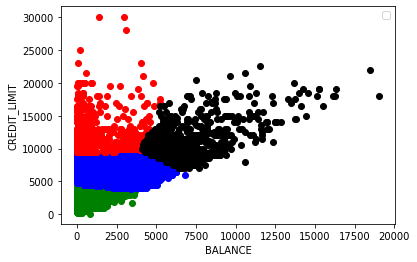

In [176]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]
df4=df1[df1.cluster==2]
df5=df1[df1.cluster==3]


plt.scatter(df2.BALANCE,df2['CREDIT_LIMIT'],color='green')
plt.scatter(df3.BALANCE,df3['CREDIT_LIMIT'],color='blue')
plt.scatter(df4.BALANCE,df4['CREDIT_LIMIT'],color='red')
plt.scatter(df5.BALANCE,df5['CREDIT_LIMIT'],color='black')

plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.legend()

In [177]:
scaler=MinMaxScaler()

scaler.fit(df1[['BALANCE']])
df1['BALANCE']=scaler.transform(df1[['BALANCE']])

scaler.fit(df1[['CREDIT_LIMIT']])
df1['CREDIT_LIMIT']=scaler.transform(df1[['CREDIT_LIMIT']])
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,BALANCE,CREDIT_LIMIT,cluster
0,0.002148,0.031720,0
1,0.168169,0.232053,1
2,0.131026,0.248748,1
4,0.042940,0.038397,0
5,0.095038,0.058431,0
...,...,...,...
8943,0.000308,0.015025,0
8945,0.001496,0.031720,0
8947,0.001229,0.031720,0
8948,0.000707,0.015025,0


In [178]:
km=KMeans(n_clusters=4)
df1_predic=km.fit_predict(df1[['BALANCE','CREDIT_LIMIT']])
df1_predict

array([0, 1, 1, ..., 0, 0, 0])

In [179]:
df1['cluster']=df1_predict

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
df1

,BALANCE,CREDIT_LIMIT,cluster
0,0.002148,0.031720,0
1,0.168169,0.232053,1
2,0.131026,0.248748,1
4,0.042940,0.038397,0
5,0.095038,0.058431,0
...,...,...,...
8943,0.000308,0.015025,0
8945,0.001496,0.031720,0
8947,0.001229,0.031720,0
8948,0.000707,0.015025,0


In [181]:
km.cluster_centers_

array([[0.21347004, 0.22245693],
       [0.04184052, 0.07525932],
       [0.41807333, 0.42480425],
       [0.03769331, 0.28186655]])

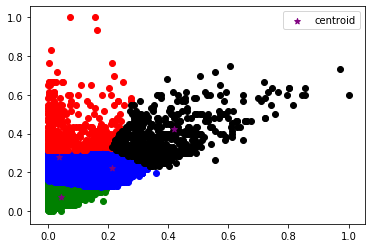

In [182]:
df2=df1[df1.cluster==0]
df3=df1[df1.cluster==1]
df4=df1[df1.cluster==2]
df5=df1[df1.cluster==3]


plt.scatter(df2.BALANCE,df2['CREDIT_LIMIT'],color='green')
plt.scatter(df3.BALANCE,df3['CREDIT_LIMIT'],color='blue')
plt.scatter(df4.BALANCE,df4['CREDIT_LIMIT'],color='red')
plt.scatter(df5.BALANCE,df5['CREDIT_LIMIT'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centroid')

plt.legend()

In [185]:
k_data=range(1,15)
sse=[]

for k in k_data:
    km=KMeans(n_clusters=k)
    km.fit(df1[['BALANCE','CREDIT_LIMIT']])
    sse.append(km.inertia_)

In [186]:
sse

[233.46522461484645,
 113.0113929653803,
 75.9331369967241,
 57.05778476660353,
 44.78064321588412,
 37.01503882161883,
 31.948248927638183,
 27.46147026377916,
 24.350257894339027,
 21.688877203203916,
 19.31203566255277,
 17.38010788802457,
 15.660576470441656,
 14.521090014259968]

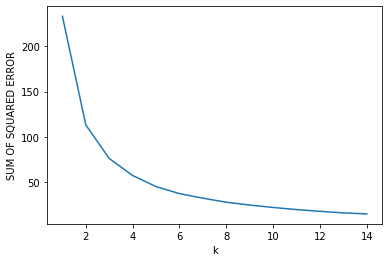

In [190]:
plt.xlabel('k')
plt.ylabel('SUM OF SQUARED ERROR')
plt.plot(k_data,sse)